In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from stable_baselines3 import SAC

from utils import Interface, DetModel, QD_T_Env, eval_model, plots
from qutip import basis

In [2]:
try:
    model = SAC.load("sac_1qb_control_target_rand")
    print('Loaded the SAC model')
except AttributeError:
    # if we can't load a trained model for a demo, let's use a lazy deterministic model
    model = DetModel(1)
    print('Loaded a deterministic model. Beware, it does not handle dephasing!')

Loaded the SAC model


/home/breznychenko/.local/lib/python3.8/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(


In [ ]:
# the interface: the code behind it is what is in the next window, but more interactive way to enter the parameters 
s = Interface(model)
s.show()

/home/breznychenko/.local/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


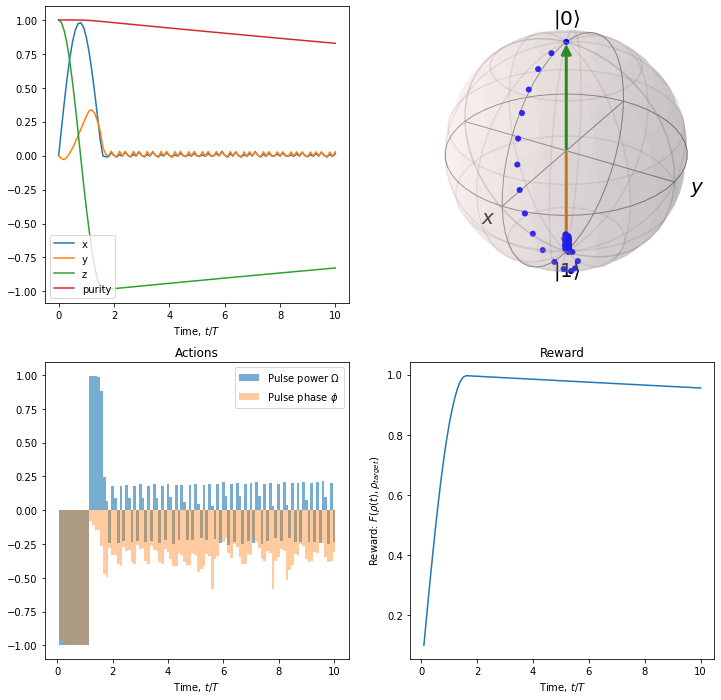

In [3]:
# preview of the ipywidgets result:

env = QD_T_Env(rho0 = basis(2,0)*basis(2,0).dag(),   # ground state as initial
               detuning = 0.5,                       # detuning: rotaion around Z axis
               gamma = 0.01,                         # spont. emission: pulling the state to the ground state
               target = basis(2,1)*basis(2,1).dag(), # fully excited state as target. The current RL agent doesn't support other targets
               steps_max = 100,
               max_power = 1)
result = eval_model(env, model, n_steps = 100, verbose = 0)
plots(*result, simple = False, n_steps = 100)